In [17]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [18]:
df_envi_inter = pd.read_csv("../../../DataSet/Envi/envi.csv")
df_envi_inter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    169 non-null    object
 1   Envi    169 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.8+ KB


In [19]:
df_envi_inter

,Date,Envi
0,04/01/2015,44562
1,11/01/2015,38112
2,18/01/2015,50355
3,25/01/2015,51922
4,01/02/2015,67496
...,...,...
164,25/02/2018,42116
165,04/03/2018,44454
166,11/03/2018,28399
167,18/03/2018,49145


In [20]:
df_envi_inter["Date"] = pd.to_datetime(df_envi_inter["Date"], format="%d/%m/%Y")
df_envi_inter.sort_values(by="Date", inplace=True)
df_envi_inter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    169 non-null    datetime64[ns]
 1   Envi    169 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.8 KB


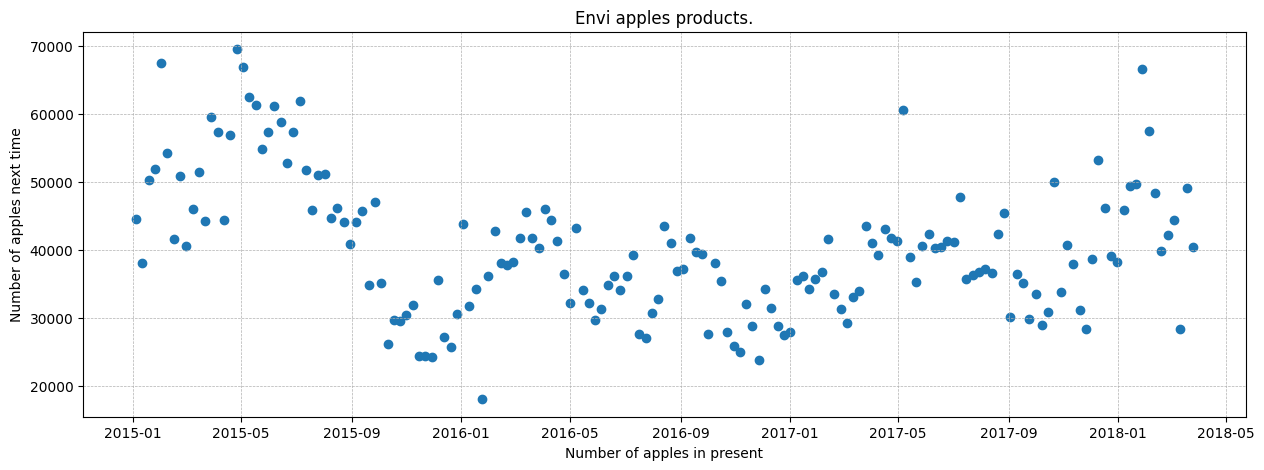

In [32]:
plt.figure(figsize=(15,5))
plt.title("Envi apples products.")
plt.scatter(df_envi_inter["Date"], df_envi_inter["Envi"])
plt.xlabel("Number of apples in present")
plt.ylabel("Number of apples next time")
plt.grid(linestyle='--', linewidth=0.5)
plt.show()

In [22]:
def writeEvaluate(model, mae:np.float64, mse:np.float64, r2:np.float64, mape:np.float64, filename):
    df = pd.read_csv(filename)
    row_index = df.index.get_loc(df.loc[df['Model'] == model].index[0])
    df.at[row_index,'Mae'] = mae
    df.at[row_index,'Mse'] = mse
    df.at[row_index,'R2'] = r2
    df.at[row_index,'Mape'] = mape

    df.to_csv(filename,encoding='utf-8', sep=',', index=False)

In [23]:
def findBestRandomState(r,t, x, y):
    random = 0
    a = 1000000

    for _ in range(r,t):
        x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=_)
        buffer = []

        for row in x_test[:,1:]:
            buffer.append(np.mean(row))

        if (buff := mean_absolute_error(y_test[:, 1:], buffer)) < a:
            a = buff
            random = _
    print(a, random)

Function Create X Sequence to Prdict 1

In [24]:
def createSequenceToOneDataSet(r, data:pd.DataFrame):  # Create Sequence DataSet
    df = data.copy()
    i = 1
    
    while i < r:
        df[f'x{i}'] = df['Envi'].shift(-i)
        i += 1

    if i == r:
        df['y'] = df['Envi'].shift(-i)

    df = df.dropna(axis=0)
    return df

DataSet for Predict y by Use Sequence X

In [25]:
df = createSequenceToOneDataSet(5, df_envi_inter)
df

,Date,Envi,x1,x2,x3,x4,y
0,2015-01-04,44562,38112.0,50355.0,51922.0,67496.0,54229.0
1,2015-01-11,38112,50355.0,51922.0,67496.0,54229.0,41548.0
2,2015-01-18,50355,51922.0,67496.0,54229.0,41548.0,50872.0
3,2015-01-25,51922,67496.0,54229.0,41548.0,50872.0,40578.0
4,2015-02-01,67496,54229.0,41548.0,50872.0,40578.0,46025.0
...,...,...,...,...,...,...,...
159,2018-01-21,49711,66654.0,57481.0,48309.0,39773.0,42116.0
160,2018-01-28,66654,57481.0,48309.0,39773.0,42116.0,44454.0
161,2018-02-04,57481,48309.0,39773.0,42116.0,44454.0,28399.0
162,2018-02-11,48309,39773.0,42116.0,44454.0,28399.0,49145.0


In [26]:
x = np.array(df.drop(columns='y'))
y = np.array(df.drop(['Envi','x1','x2','x3','x4'],axis=1))

# scaler = StandardScaler()
# scaler.fit(x)
# x = scaler.transform(x)
# scaler.fit(y.reshape(-1,1))
# y = scaler.transform(y.reshape(-1,1))


Find best randomState for train_test_split

In [27]:
# findBestRandomState(1,1000000,x, y)
# seed 442710 MAE: 2969.10

Train test split

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state=442710)

x_train = np.array(sorted(x_train, key=lambda x: x[0]))
x_test = np.array(sorted(x_test, key=lambda x: x[0]))
y_train = np.array(sorted(y_train, key=lambda x: x[0]))
y_test = np.array(sorted(y_test, key=lambda x: x[0]))

Baseline Predict

In [29]:
baseline_predict = []

for row in x_test[:,1:]:
    baseline_predict.append(np.mean(row))

In [30]:
mae = mean_absolute_error(y_test[:, 1:], baseline_predict)
mse = mean_squared_error(y_test[:, 1:], baseline_predict)
r2 = r2_score(y_test[:, 1:], baseline_predict)
mape = mean_absolute_percentage_error(y_test[:, 1:], baseline_predict)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Square Error: {mse}")
print(f"R2 score: {r2}")
print(f"Mean Absolute Percentage Error: {mape}")

writeEvaluate("Baseline", mae, mse, r2, mape, "evaluate.csv")


Mean Absolute Error: 2969.1090909090913
Mean Square Error: 11993304.590303032
R2 score: 0.8621599869976108
Mean Absolute Percentage Error: 0.07773047920937705


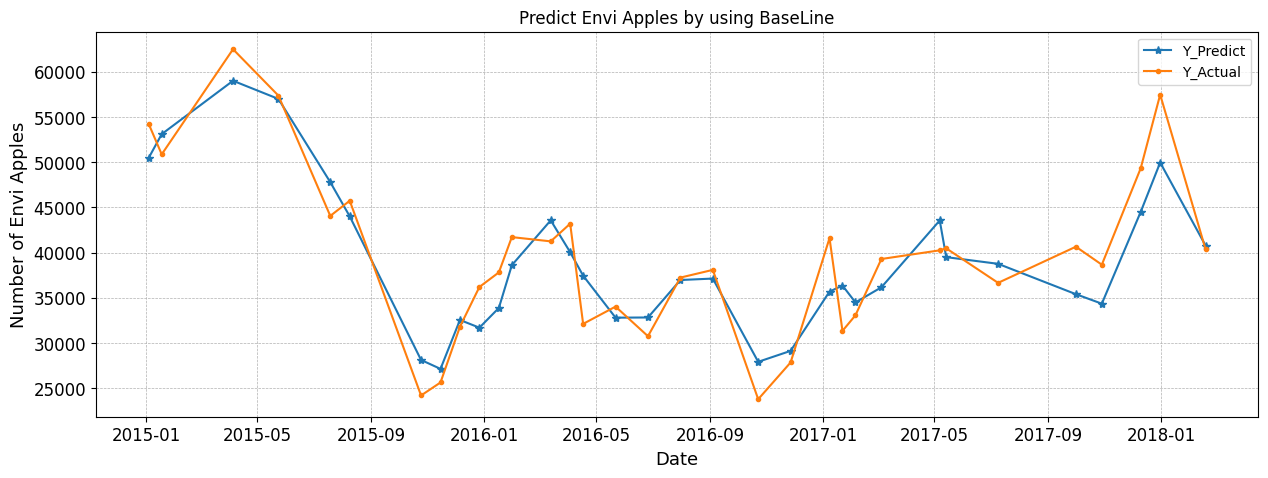

In [31]:
plt.figure(figsize=(15, 5))

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.xlabel("Date", fontsize=13)
plt.ylabel("Number of Envi Apples", fontsize=13)

plt.plot(x_test[:, :1], baseline_predict, label="Y_Predict", marker='*')
plt.plot(x_test[:,:1], y_test[:, 1:], label="Y_Actual", marker='.')


plt.title("Predict Envi Apples by using BaseLine")
plt.grid(linestyle='--', linewidth=0.5)
plt.legend()
plt.show()